#  Import the libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the dataset

In [15]:
df=pd.read_excel("Diwali-Sales-Data.xlsx")

# Perform basic steps to understand the dataset

In [16]:
df.shape

(11251, 15)

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,False,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [274]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

# Check for data types and not null values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


Here we have the columns named "status" and "unnamed1" with complete null values.So we can simply drop them

In [23]:
df.drop(columns=['Status','unnamed1'],inplace=True,axis=1)

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Cleaning the dataset

# Handling null values

In [27]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

The amount column contains 12 null values which doesn't affect our dataset.So i am simply dropping those rows

In [29]:
df.dropna(subset=['Amount'],inplace=True)

In [31]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# Removing duplicates

In [33]:
df.duplicated().sum()

8

There are 8 duplicate rows in the dataset .Lets drop them

In [35]:
df.drop_duplicates(inplace=True)

In [37]:
df.duplicated().sum()

0

# Changing Data Type of Amount Columnn

In [40]:
df['Amount'].dtype

dtype('float64')

In [42]:
df['Amount']=df['Amount'].astype('int')

In [44]:
df['Amount'].dtype

dtype('int32')

# Exploratory Data Analysis

# Descriptive Stastics

For numerical columns

In [46]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084676
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728074
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


We can see the minumum and maximum age is reasonable so no need to check for outliers for that column

For object columns

In [48]:
df.describe(include='object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11231,11231,11231,11231,11231,11231,11231,11231
unique,1247,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7828,4536,1942,4287,1581,2653


# Univariate Anlysis

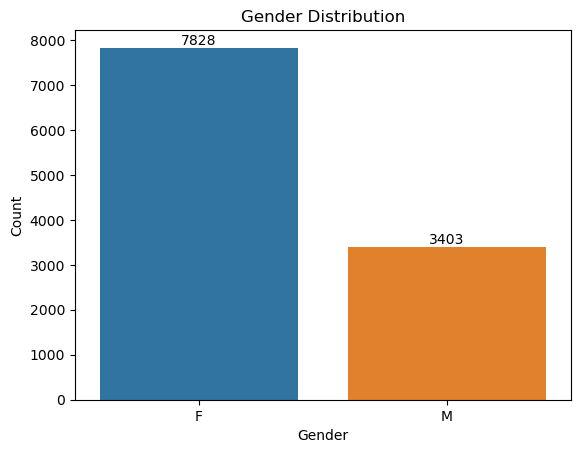

In [52]:
ax=sns.countplot(data=df,x='Gender',hue='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)

Most of the customers are Female

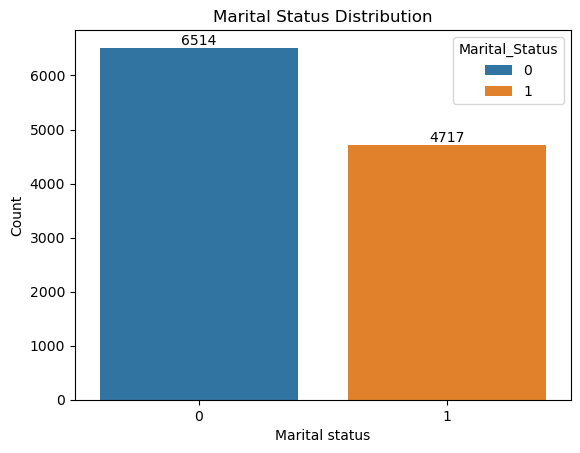

In [54]:
ax=sns.countplot(data=df,x='Marital_Status',hue='Marital_Status')
plt.title('Marital Status Distribution')
plt.xlabel('Marital status')
plt.ylabel('Count')
for bars in ax.containers:
    ax.bar_label(bars)

Most of the customers are unmarried

C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\644855654.py:1: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  ax=sns.countplot(data=df,x='Age Group',hue='Gender',palette=sns.color_palette('Set1'))


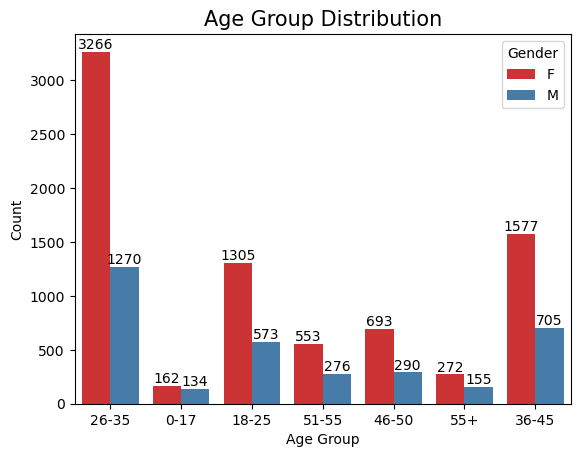

In [56]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender',palette=sns.color_palette('Set1'))
plt.title("Age Group Distribution",fontsize=15)
plt.xlabel("Age Group",fontsize=10)
plt.ylabel("Count",fontsize=10)
for bars in ax.containers: 
    ax.bar_label(bars)

Most of the customers are female from age group of 26-35

C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\2903072764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='State',palette=sns.color_palette('Set1'),order=count)
C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\2903072764.py:3: UserWarning: 
The palette list has fewer values (9) than needed (16) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(data=df,x='State',palette=sns.color_palette('Set1'),order=count)


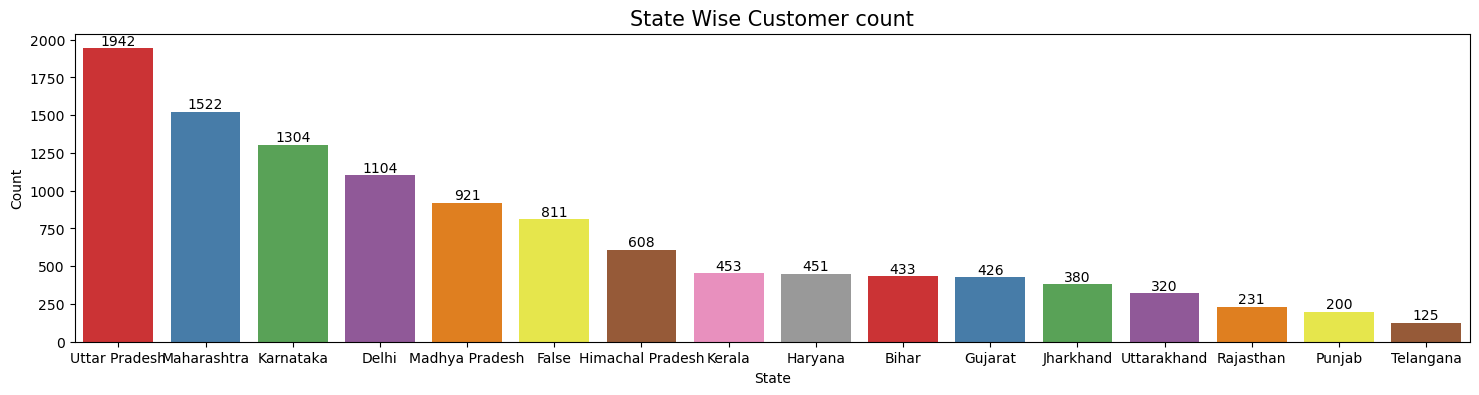

In [58]:
plt.figure(figsize=(18,4))
count=df['State'].value_counts().index.tolist()
ax=sns.countplot(data=df,x='State',palette=sns.color_palette('Set1'),order=count)
plt.title("State Wise Customer count",fontsize=15)
plt.xlabel("State",fontsize=10)
plt.ylabel("Count",fontsize=10)
for bars in ax.containers: 
    ax.bar_label(bars)

It shows most of the customers are from "Uttar Pradesh" followed by "Maharashtra","Karnataka" and "Delhi".

C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\808842727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='Occupation',palette=sns.color_palette('Set1'),order=count)
C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\808842727.py:3: UserWarning: 
The palette list has fewer values (9) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(data=df,x='Occupation',palette=sns.color_palette('Set1'),order=count)


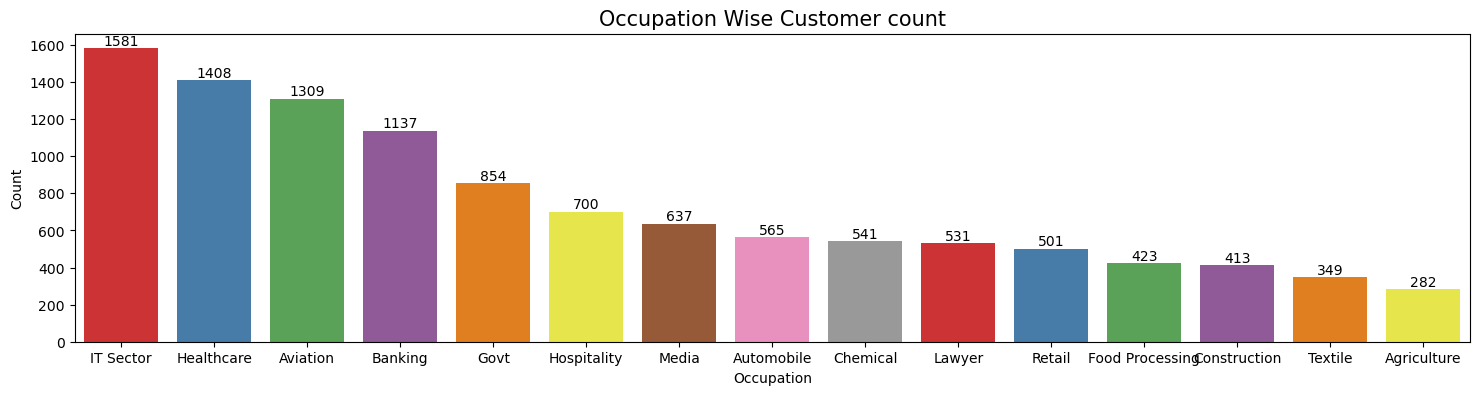

In [60]:
plt.figure(figsize=(18,4))
count=df['Occupation'].value_counts().index.tolist()
ax=sns.countplot(data=df,x='Occupation',palette=sns.color_palette('Set1'),order=count)
plt.title("Occupation Wise Customer count",fontsize=15)
plt.xlabel("Occupation",fontsize=10)
plt.ylabel("Count",fontsize=10)
for bars in ax.containers: 
    ax.bar_label(bars)

Most of the customers are from "IT Sector" followed by "Healthcare","Aviation" and "Banking Occupation"

C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\2656373422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df,x='Product_Category',palette=sns.color_palette('Set1'),order=count)
C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\2656373422.py:3: UserWarning: 
The palette list has fewer values (9) than needed (18) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(data=df,x='Product_Category',palette=sns.color_palette('Set1'),order=count)


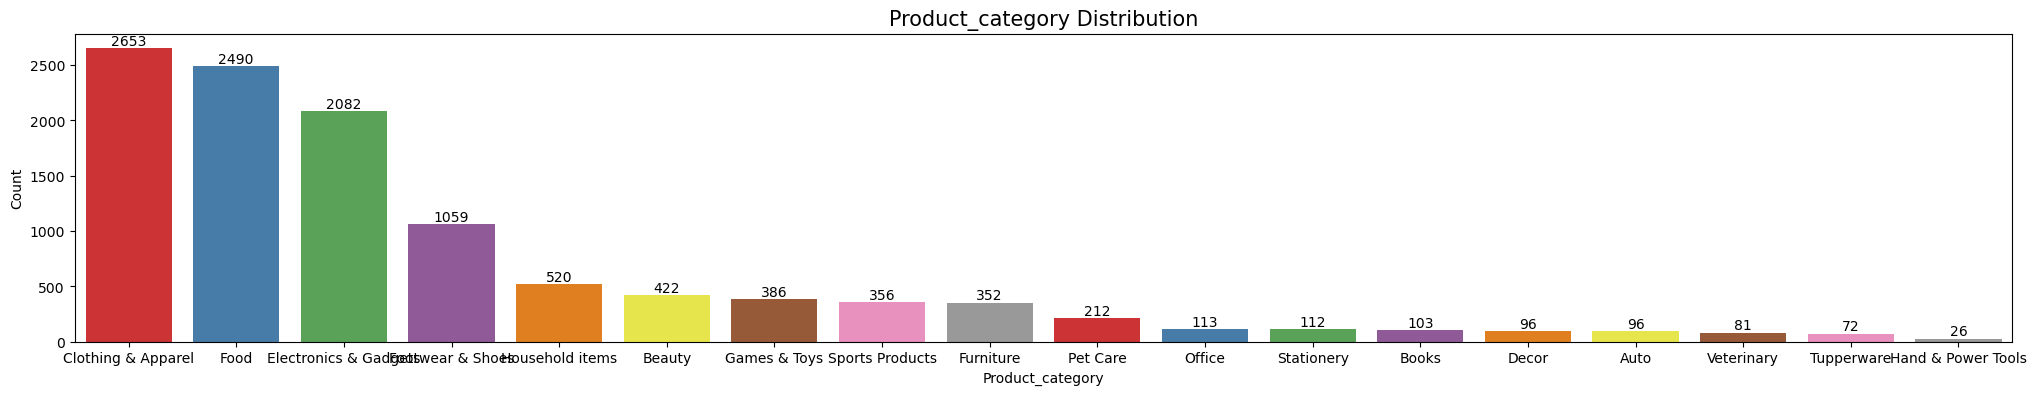

In [62]:
plt.figure(figsize=(25,4))
count=df['Product_Category'].value_counts().index.tolist()
ax=sns.countplot(data=df,x='Product_Category',palette=sns.color_palette('Set1'),order=count)
plt.title("Product_category Distribution",fontsize=15)
plt.xlabel("Product_category",fontsize=10)
plt.ylabel("Count",fontsize=10)
for bars in ax.containers: 
    ax.bar_label(bars)

Top selling products are "Clothing & Apparel","Food" and "Electronics & Gadgets"

# Bivariate Analysis

C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\2016746473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bx=sns.barplot(data=ga,x='Gender',y='Amount',palette='deep')


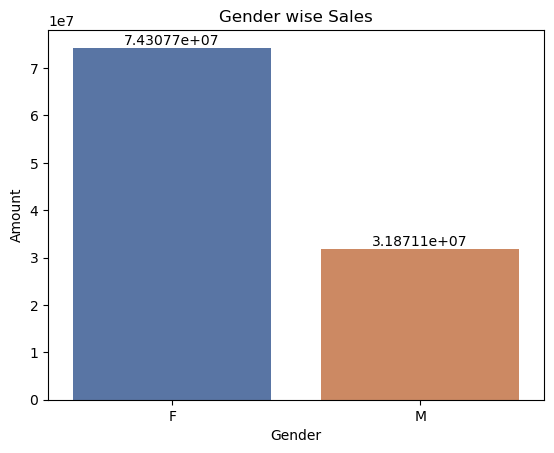

In [70]:
ga=df.groupby('Gender',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
bx=sns.barplot(data=ga,x='Gender',y='Amount',palette='deep')
plt.title('Gender wise Sales')
plt.xlabel('Gender')
plt.ylabel('Amount')
for bars in bx.containers:
    bx.bar_label(bars)

Purchasing power of female is greater than male

C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\2686869053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=sales_shaadi,x="Marital_Status",y='Amount',palette='deep')


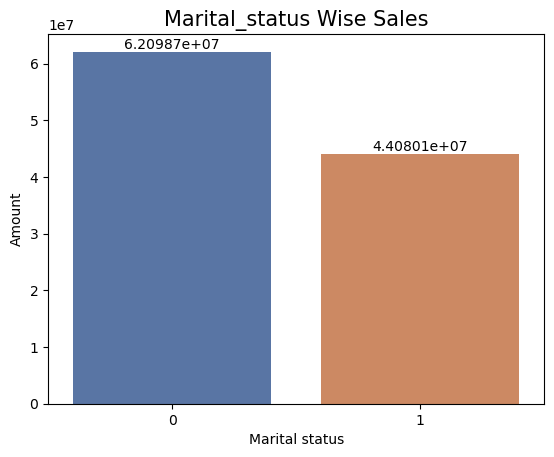

In [74]:
sales_shaadi =df.groupby('Marital_Status').agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False).head(10)
ax=sns.barplot(data=sales_shaadi,x="Marital_Status",y='Amount',palette='deep')
plt.title("Marital_status Wise Sales",fontsize=15)
plt.xlabel("Marital status",fontsize=10)
plt.ylabel("Amount",fontsize=10)
for bars in ax.containers: 
    ax.bar_label(bars)

Unmarried persons are having more purchasing power

C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\2749843389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=age,x="Age Group",y='Amount',palette=sns.color_palette("Set2"))
C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\2749843389.py:3: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  ax=sns.barplot(data=age,x="Age Group",y='Amount',palette=sns.color_palette("Set2"))


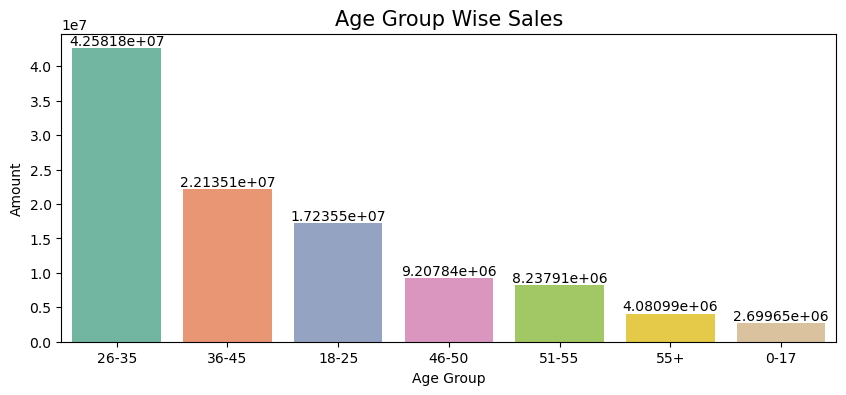

In [78]:
age=df.groupby('Age Group',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(10,4))
ax=sns.barplot(data=age,x="Age Group",y='Amount',palette=sns.color_palette("Set2"))
plt.title("Age Group Wise Sales",fontsize=15)
plt.xlabel("Age Group",fontsize=10)
plt.ylabel("Amount",fontsize=10)
for bars in ax.containers: 
    ax.bar_label(bars)

Purchasing power of people aged 26-35 is more

In [81]:
sales_state =df.groupby('State').agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False).head(10)

C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\3394258670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=sales_state,x="State",y="Amount",palette=sns.color_palette("Set2"))
C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\3394258670.py:2: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(data=sales_state,x="State",y="Amount",palette=sns.color_palette("Set2"))


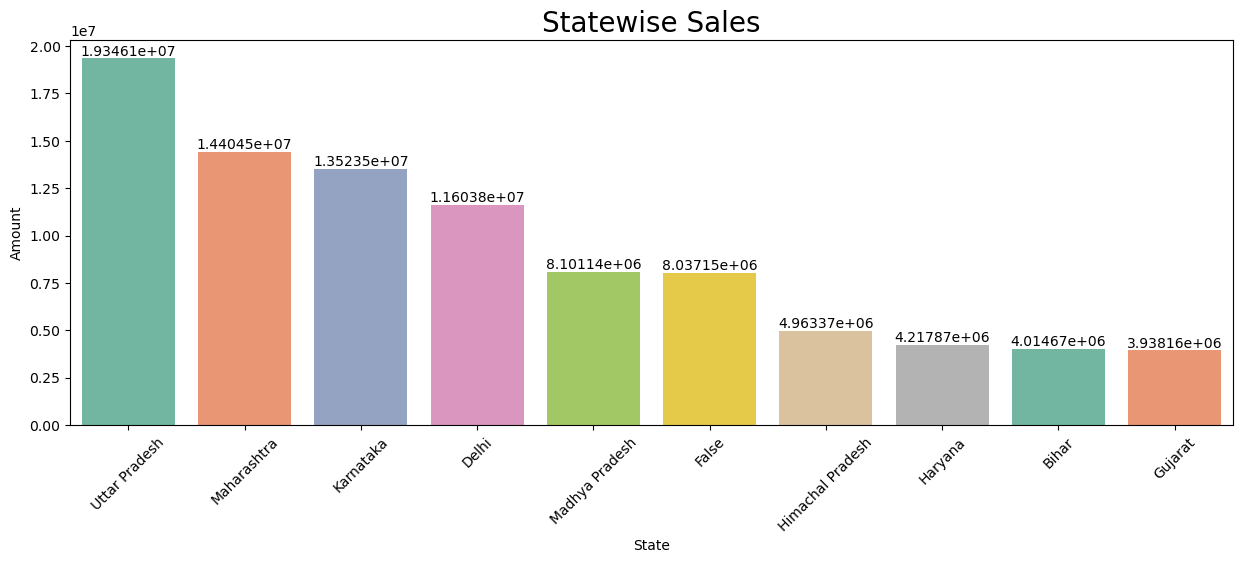

In [83]:
plt.figure(figsize=(15,5))
ax=sns.barplot(data=sales_state,x="State",y="Amount",palette=sns.color_palette("Set2"))
plt.title("Statewise Sales",fontsize=20)
plt.xlabel('State',fontsize=10)
plt.ylabel("Amount",fontsize=10)
plt.xticks(rotation=45)
for bars in ax.containers: 
    ax.bar_label(bars)

sales are more from Uttar Pradesh, Maharashtra, Karnataka and Delhi are more

In [86]:
sales_occupation =df.groupby('Occupation').agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False).head(10)

C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\3545172492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=sales_occupation,x="Occupation",y='Amount',palette=sns.color_palette("Set2"))
C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\3545172492.py:2: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(data=sales_occupation,x="Occupation",y='Amount',palette=sns.color_palette("Set2"))


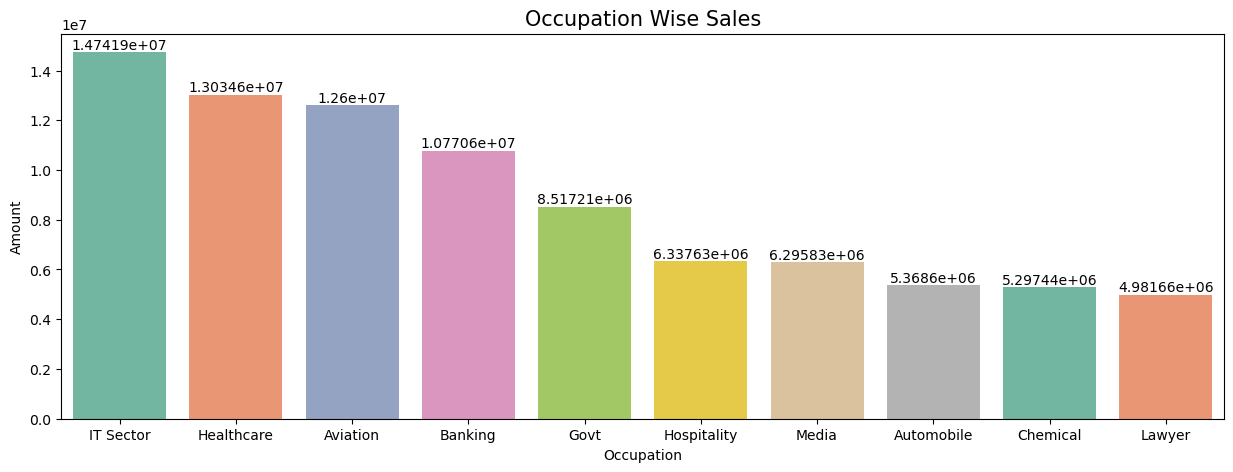

In [88]:
plt.figure(figsize=(15,5))
ax=sns.barplot(data=sales_occupation,x="Occupation",y='Amount',palette=sns.color_palette("Set2"))
plt.title("Occupation Wise Sales",fontsize=15)
plt.xlabel("Occupation",fontsize=10)
plt.ylabel("Amount",fontsize=10)
for bars in ax.containers: 
    ax.bar_label(bars)

People who are working in IT Sector,Healthcare then Aviation are buying more

In [92]:
sales_pc=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\1100495362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=sales_pc,x='Product_Category',y='Amount',palette=sns.color_palette('Set1'))
C:\Users\Aymuos\AppData\Local\Temp\ipykernel_22696\1100495362.py:2: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(data=sales_pc,x='Product_Category',y='Amount',palette=sns.color_palette('Set1'))


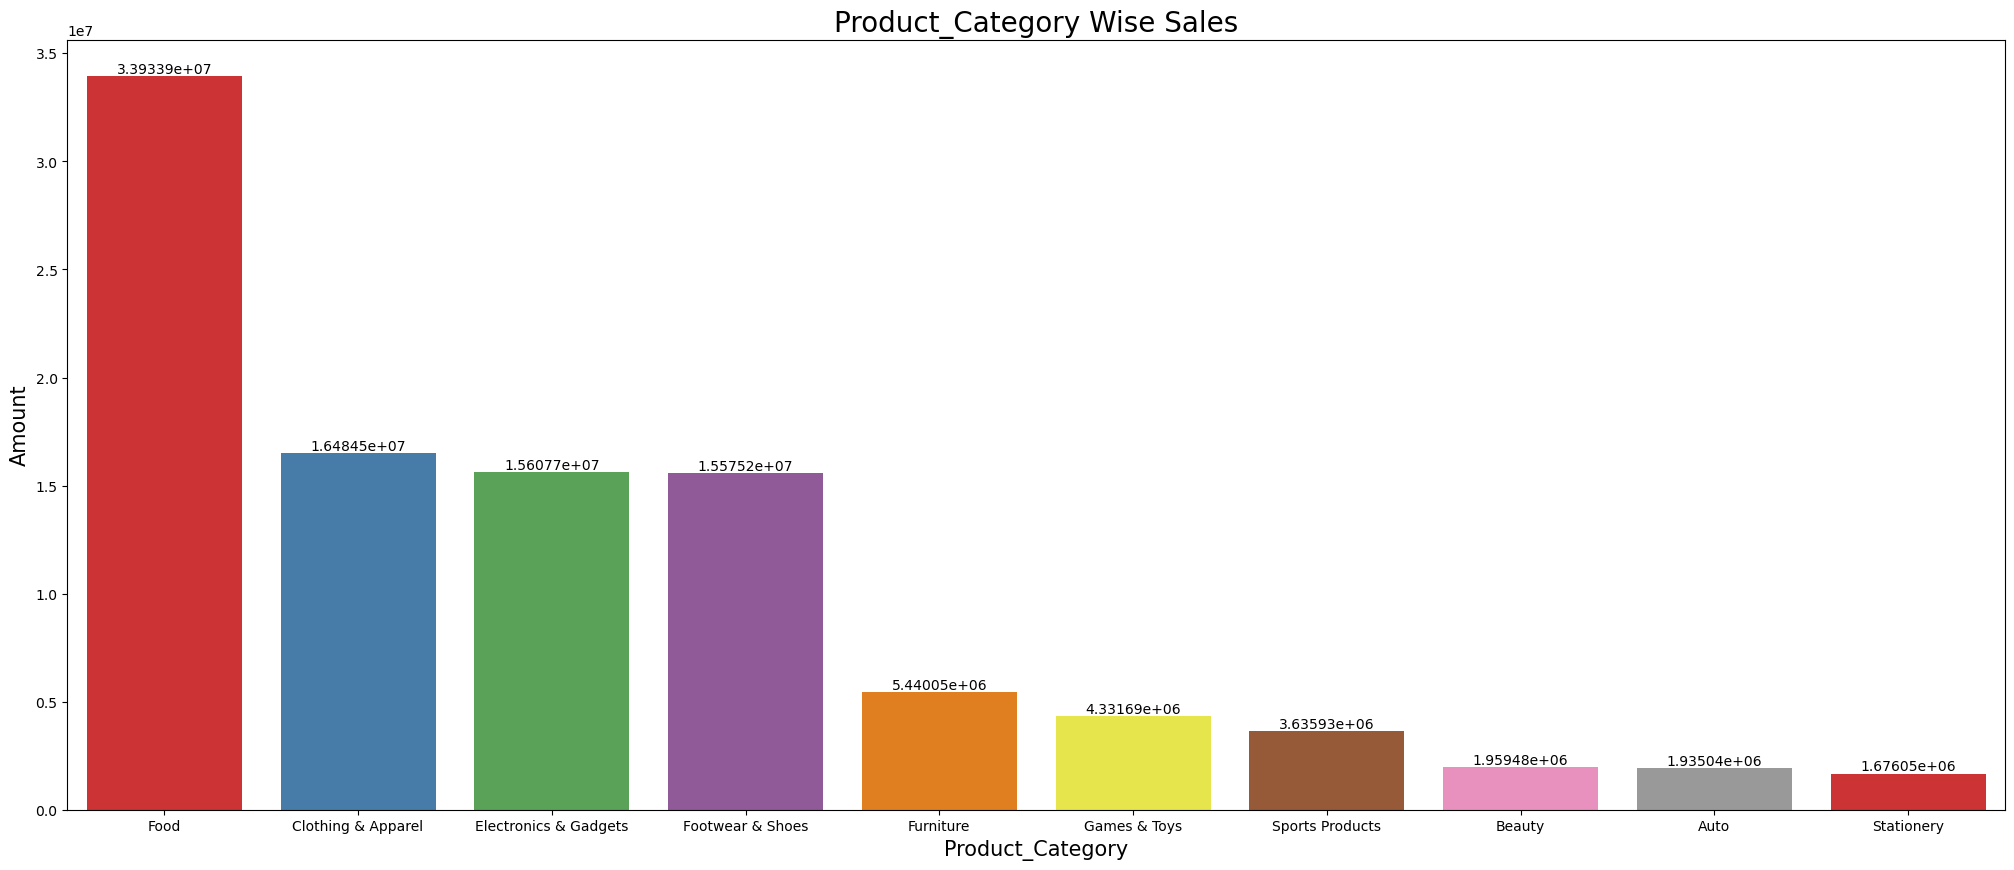

In [94]:
plt.figure(figsize=(25,10))
ax=sns.barplot(data=sales_pc,x='Product_Category',y='Amount',palette=sns.color_palette('Set1'))
plt.title('Product_Category Wise Sales',fontsize=20)
plt.xlabel('Product_Category',fontsize=15)
plt.ylabel('Amount',fontsize=15)
for bars in ax.containers: 
    ax.bar_label(bars)

Food,Clothing & Apparel,Electronics & Gadjets and Footwear & shoes are the top sold products

# Insights

Based on the analyzed data, it can be concluded that unmarried female individuals aged 26 to 35, employed in the Information Technology, Healthcare, and Aviation sectors, and residing in the states of Uttar Pradesh, Maharashtra, Delhi and Karnataka, exhibit a greater likelihood of purchasing products in the categories of Food, Clothing, and Electronics.